# <u>Case Study 16</u>: Training Data vs. Test Data

In our most recent Case Studies, we have begun to explore how to fit models to our data.  We have incorporated different forms of predictor variables for these models, including adding multiple predictor variables to our model and adding interaction terms.

Now that we've created many possible models that we can use, how do we pick the "best" model, or the one single model?  We'll start to answer this question with the next few Case Studies for the semester, introducing some of the possible methods that we could use in order to select the "best" model.

In this Case Study, we will continue modeling the approval of the President's Foreign Policy with Age, Sex, and Political Affiliation.

Specifically, we'd like to address: **What is a model that is *good* at predicting approval for the President's Foreign Policy based on Age, Sex, and Political Affiliation *with new data***?

Suppose we work at a political advertising agency. Rather than seek to **understand the relationship** between approval for the president's foreign policy with sex, age, and political affiliation, we would like build a model that will give us the **best predictions** for adults living in the U.S. in which we *don't know what they think about the president's foreign policy*.

We can assume that this agency has the age, sex, political affiliation, and address of all registered voters in the state. So one goal that this political advertising agency might have is to use this data to make predictions about whether a given person that lives at a particular house approves of the president's foreign policy. They could then use that information to decide whether to mail political advertising pamphplets to this address.


## Python Libraries and Packages
**Python libraries:**

    statsmodels.api, statsmodels.formula.api, scikit-learn
 
## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

## Different Goals for Building a Regression Model

We have two primary goals for building a regression model:

- **predicting** a value for a new observation
- **understanding** a phenomenon or the relationship between two variables

Predicting a value is all about *using* the model in order to estimate a new value.  Understanding a phenomenon focuses more on the *coefficient values*, and often has a special focus on inference.

We will look at an example in lecture with the body dimensions dataset with two different goals.  Below, you can find the models that we fit in order to approach these two different goals.

Read the body dimensions dataset.

In [2]:
df=pd.read_csv('bdims.csv')
df.head()

,biacromial_diameter,pelvic_breadth,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,...,forearm_girth,knee_diameter.1,calf_girth,ankle_girth,wrist_girth,age,weight,height,sex,age_group
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,Male,under_30
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,Male,under_30
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,Male,under_30
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,Male,under_30
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,Male,under_30


In [3]:
df.columns

Index(['biacromial_diameter', 'pelvic_breadth', 'bitrochanteric_diameter',
       'chest_depth', 'chest_diameter', 'elbow_diameter', 'wrist_diameter',
       'knee_diameter', 'ankle_diameter', 'shoulder_girth', 'chest_girth',
       'waist_girth', 'navel_girth', 'hip_girth', 'thigh_girth', 'bicep_girth',
       'forearm_girth', 'knee_diameter.1', 'calf_girth', 'ankle_girth',
       'wrist_girth', 'age', 'weight', 'height', 'sex', 'age_group'],
      dtype='object')

In [4]:
df[['bicep_girth', 'age', 'sex', 'weight', 'height']]

,bicep_girth,age,sex,weight,height
0,32.5,21,Male,65.6,174.0
1,34.4,23,Male,71.8,175.3
2,33.4,28,Male,80.7,193.5
3,31.0,23,Male,72.6,186.5
4,32.0,22,Male,78.8,187.2
...,...,...,...,...,...
482,30.3,29,Female,71.8,176.5
483,30.1,21,Female,55.5,164.4
484,27.4,33,Female,48.6,160.7
485,30.6,33,Female,66.4,174.0


In [5]:
results=smf.ols('bicep_girth~age+sex+weight+height', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            bicep_girth   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     590.9
Date:                Wed, 21 Apr 2021   Prob (F-statistic):          2.94e-184
Time:                        22:52:06   Log-Likelihood:                -963.88
No. Observations:                 487   AIC:                             1938.
Df Residuals:                     482   BIC:                             1959.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      31.4253      2.032     15.465      0.000      27.432      35.418
sex[T.Male]     3.4235      0.235     14.590      0.000       2.962       3.885
age            -0.0132      0.009     -1.547      0.123      -0.030       0.004
weight          0.2475      0.009     26.789      0.000       0.229       0.266
height         -0.1088      0.013     -8.129      0.000      -0.135      -0.083
==============================================================================
Omnibus:                       13.978   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.394
Skew:                           0.347   Prob(JB):                     0.000454
Kurtosis:                       3.526   Cond. No.                     4.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
results=smf.ols('bicep_girth~sex+weight+height', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            bicep_girth   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     784.7
Date:                Wed, 21 Apr 2021   Prob (F-statistic):          3.19e-185
Time:                        22:52:06   Log-Likelihood:                -965.09
No. Observations:                 487   AIC:                             1938.
Df Residuals:                     483   BIC:                             1955.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      30.7279      1.984     15.486      0.000      26.829      34.627
sex[T.Male]     3.3844      0.234     14.487      0.000       2.925       3.843
weight          0.2449      0.009     26.922      0.000       0.227       0.263
height         -0.1060      0.013     -7.980      0.000      -0.132      -0.080
==============================================================================
Omnibus:                       14.566   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.497
Skew:                           0.345   Prob(JB):                     0.000262
Kurtosis:                       3.581   Cond. No.                     4.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Testing and Training Data

### Data Setup

We will be using *a portion* of our 2017 random sample Pew dataset to train a logistic regression model that predicts the probability that an adult living in the U.S. supported the president's foreign policy given sex, age, and political affiliation.

We will start by preparing the data, including loading it, cleaning it, and creating any additional variables.

In [7]:
missing_values = ["NaN", "nan", "Don't know/Refused (VOL.)"]
df = pd.read_csv('Feb17public.csv',
                 na_values=missing_values)[['age', 'sex', \
                                            'q5cf1', 'party']]
df.head()

,age,sex,q5cf1,party
0,80.0,Female,NaN,Independent
1,70.0,Female,Disapprove,Democrat
2,69.0,Female,Disapprove,Independent
3,50.0,Male,NaN,Republican
4,70.0,Female,Disapprove,Democrat


Let's first drop the rows in this dataset with missing values.

In [8]:
df = df.dropna()
df.head()

,age,sex,q5cf1,party
1,70.0,Female,Disapprove,Democrat
2,69.0,Female,Disapprove,Independent
4,70.0,Female,Disapprove,Democrat
6,89.0,Female,Disapprove,Independent
7,92.0,Female,Approve,Republican


Report the size of the data.

In [9]:
n=df.shape[0]
n

679

We also will create a 0/1 response variable value for the logistic regression model where:
* approve =1 and
* disapprove =0.

In [10]:
df['y'] = df['q5cf1'].map({'Disapprove':0,'Approve':1})
df.head()

,age,sex,q5cf1,party,y
1,70.0,Female,Disapprove,Democrat,0
2,69.0,Female,Disapprove,Independent,0
4,70.0,Female,Disapprove,Democrat,0
6,89.0,Female,Disapprove,Independent,0
7,92.0,Female,Approve,Republican,1


### Creating the Training and Test Dataset

Next, we split the data into the:
* **training dataset**: where we randomly select 80% of observations from Pew dataset and the
* **test data set**: comprised of the remaining 20% of observations from Pew dataset.

It's usually best to have your training dataset have much more observations than your test dataset!

We use the **train_test_split()** function from the **sklearn.model_selection** package to do this. The parameters for this function are:
* the dataframe we wish to randomly split into a training dataset and a test dataset
* the **test_size**= the percent of the dataset we would like to be allocated to the test dataset
* we an also supply a **random_state** number.

In [11]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                                   test_size=0.20, 
                                   random_state=123)

#### Let's inspect the newly created training dataset.

In [12]:
df_train

,age,sex,q5cf1,party,y
725,39.0,Female,Disapprove,Democrat,0
836,67.0,Female,Disapprove,Democrat,0
961,51.0,Male,Disapprove,Democrat,0
348,72.0,Male,Approve,Republican,1
1025,61.0,Female,Disapprove,Democrat,0
...,...,...,...,...,...
205,90.0,Female,Approve,Republican,1
693,20.0,Male,Approve,Independent,1
838,68.0,Male,Approve,Republican,1
791,56.0,Male,Disapprove,Independent,0


We can double check that this training dataset contains about 80% of the observations from df.

In [13]:
df_train.shape[0]/df.shape[0]

0.7997054491899853

Let's inspect this new test dataset.

In [14]:
df_test

,age,sex,q5cf1,party,y
337,79.0,Female,Approve,Republican,1
424,30.0,Female,Disapprove,Independent,0
751,46.0,Male,Disapprove,Independent,0
1423,77.0,Male,Disapprove,Democrat,0
1367,58.0,Male,Approve,Independent,1
...,...,...,...,...,...
872,42.0,Female,Approve,Republican,1
915,52.0,Male,Disapprove,Democrat,0
535,22.0,Male,Disapprove,Independent,0
1075,69.0,Female,Disapprove,Democrat,0


We can double check that this test dataset contains about 20% of the observations from df.

In [15]:
df_test.shape[0]/df.shape[0]

0.20029455081001474

### Fit (i.e. *train*) the model to *training data*.

Next we will **train** our logistic regression model with the **training dataset** only.

In [16]:
pewmod = smf.logit('y ~ party + age + sex',
                   data=df_train).fit()
pewmod.summary()

Optimization terminated successfully.
         Current function value: 0.402672
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  543
Model:                          Logit   Df Residuals:                      536
Method:                           MLE   Df Model:                            6
Date:                Wed, 21 Apr 2021   Pseudo R-squ.:                  0.3899
Time:                        22:52:06   Log-Likelihood:                -218.65
converged:                       True   LL-Null:                       -358.39
Covariance Type:            nonrobust   LLR p-value:                 2.035e-57
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.6644      0.535     -8.719      0.000      -5.713      -3.616
party[T.Independent]              2.1964      0.352      6.232      0.000       1.506       2.887
party[T.No preference (VOL.)]     2.7477      0.722      3.805      0.000       1.332       4.163
party[T.Other party (VOL.)]       4.0648      1.230      3.306      0.001       1.655       6.475
party[T.Republican]               4.4606      0.388     11.498      0.000       3.700       5.221
sex[T.Male]                       0.9140      0.252      3.633      0.000       0.421       1.407
age                               0.0271      0.007      3.840      0.000       0.013       0.041
=================================================================================================
"""

### *Test* the model's predictive accuracy with the *test dataset*.

Finally, in order to get an idea as to how well our trained logistic regression model with perform with new data (that was not factored in to the optimal selection of $\hat{\beta}_0, \hat{\beta}_1,...,\hat{\beta}_p$) we will calculate various metric that assess the predictive performance of our model with the **test dataset** including the:
* ROC
* AUC
* sensitivity and specificity for a few selected predictive probability thresholds.

First, get the predictive probabilities of the *test dataset* with this trained model.

The predict function uses the fitted model to extract any exogenous variables it needs from the test data. We do not have to specify which variables. We just provide the whole test data frame. Compare the following two code cells and results.

In [17]:
# predictive probabilities - explicit method
phat_test = pewmod.predict(exog=df_test[['age', 'sex', 'party']])
phat_test.head(10)

337     0.874386
424     0.160607
751     0.424221
1423    0.159691
1367    0.505054
440     0.079614
801     0.850883
1279    0.890355
187     0.082286
342     0.057777
dtype: float64

In [18]:
# predictive probabilities - implicit method
phat_test = pewmod.predict(exog=df_test)
phat_test.head(10)

337     0.874386
424     0.160607
751     0.424221
1423    0.159691
1367    0.505054
440     0.079614
801     0.850883
1279    0.890355
187     0.082286
342     0.057777
dtype: float64

In [19]:
df_test['phat_test']=phat_test
df_test

<ipython-input-19-c185c916a8e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['phat_test']=phat_test


,age,sex,q5cf1,party,y,phat_test
337,79.0,Female,Approve,Republican,1,0.874386
424,30.0,Female,Disapprove,Independent,0,0.160607
751,46.0,Male,Disapprove,Independent,0,0.424221
1423,77.0,Male,Disapprove,Democrat,0,0.159691
1367,58.0,Male,Approve,Independent,1,0.505054
...,...,...,...,...,...,...
872,42.0,Female,Approve,Republican,1,0.718312
915,52.0,Male,Disapprove,Democrat,0,0.087940
535,22.0,Male,Disapprove,Independent,0,0.277510
1075,69.0,Female,Disapprove,Democrat,0,0.057777


Next, we generate the ROC curve and calculate the AUC for the *test dataset*.

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_test['y'], y_score=df_test['phat_test'])
auc_pew = roc_auc_score(y_true=df_test['y'], y_score=df_test['phat_test'])

In [21]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

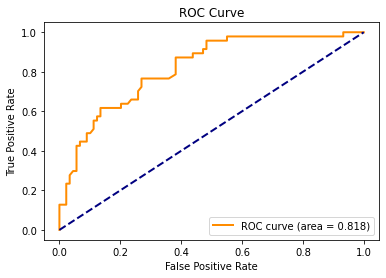

In [22]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

**Interpretation:**

<u>Evaluation</u>: The AUC for the **test dataset** is 0.818. 

<u>What can we use it form</u>: This gives us a sense of how good our logistic regression model (which has been trained with the **training dataset**) would be at predicting the probability that an adult living in the U.S. approves of the president's foreign policy with *new data* (in which we don't know the actual answer of whether they disapprove or approve. 

<u>Interpreting AUC</u>: Because the AUC is somewhat high (ie. closer to 1 than it is to 0.5), this tells us that there does exist some predictive probability threshold that gets somewhat close to giving us the ideal scenario of a model with a false positive rate of 0 and a true positive rate of 1 with new data.

### Finding a "good" (FPR, TPR) combination.

Ideally, we would like to pick a predictive probability threshold that gives us a false positive rate of 0 and true positive rate of 1. However, this ROC curve shows that there does not exist a predictive probability threshold that will give us this ideal combination. So what predictive probability threshold should we choose?

Well, it depends on much a high **true positive rate** is worth to you vs. a low **false positive rate** is to you. 

**Here are a couple options:**

<u>Option 1</u>: About (FPR = 0.5, TPR = 0.95)

Notice how that at a FPR of 0.5, the TPR starts to level off in the ROC curve above. By increasing the FPR any more past 0.5, we do not gain much more in the way of a better (higher) TPR. So we could choose the predictive probability threshold that gives us this combination of (FPR = 0.5, TPR = 0.95).

<u>Option 2</u>:  About (FPR = 0.1, TPR = 0.6) 

Notice how that at a TPR of 0.6, the FPR starts to level off in the ROC curve above. By decreasing the TPR any more past 0.6, we do not gain much more in the way of a better (lower) FPR. So we could choose the predictive probability threshold that gives us this combination of (FPR = 0.1, TPR = 0.6).

**What option would a political advertising group choose?**

<u>Political Ad Group 1</u>:
Suppose this group really values predicting as many people as possible that support the president's foreign policy (ie. are a 1 or positive). Furthermore there is no penalty for mailing ads to houses in which the homeowners don't support the policy (ie. are a 0 or negative).

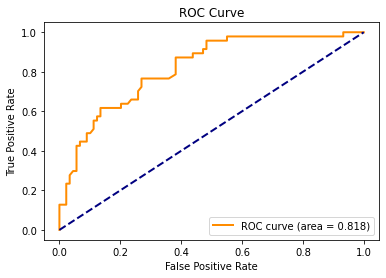

In [23]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

<u>Political Ad Group 2</u>:
Suppose this group would *ideally* like to predict as many people as possible that support the president's foreign policy (ie. are a 1/positive), but have learned that there is a very high backfire effect when they mail ads to houses in which the homeowners don't support the policy (ie. are a 0 or negative).

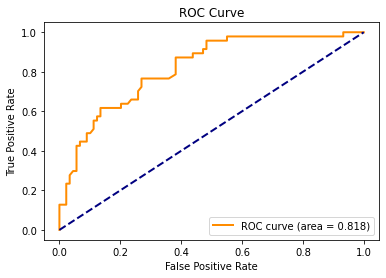

In [24]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

### Finding the predictive probability threshold that corresponds to a (FPR, TPR).

You can use this defined function below to quickly generate the fpr and tpr of a model given:
* y = the *actual* 0/1 response variable values for a given dataset
* pred_prob = the predictive probabilities for each of the observations of a given dataset
* thresh = a predictive probability threshold value

In [25]:
from sklearn.metrics import confusion_matrix

def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
                         'tpr':[tpr], 
                         'fpr':[fpr]})

For instance, the **test dataset** has a tpr = 0.6170 and a fpr = 0.1348 given a predictive probability threshold of $p_0=0.5$ with this logistic regression model.

In [26]:
tpr_fpr_thresh(df_test['y'], df_test['phat_test'], 0.5)

,threshold,tpr,fpr
0,0.5,0.617021,0.134831


Let's iterate through a series of predictive probability thresholds starting from $p_0=0$ and ending with $p_0=1$ and a step size of 0.01, to see if we can find which predictive probability threshold will give us:
* <u>Option 1</u>: About (FPR = 0.5, TPR = 0.95) and
* <u>Option 2</u>: About (FPR = 0.1, TPR = 0.6).

In [27]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['y'], df_test['phat_test'], thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr  fpr
0       0.01  1.0  1.0
   threshold       tpr       fpr
0       0.02  0.978723  0.932584
   threshold       tpr       fpr
0       0.03  0.978723  0.831461
   threshold       tpr       fpr
0       0.04  0.978723  0.786517
   threshold       tpr       fpr
0       0.05  0.978723  0.752809
   threshold       tpr       fpr
0       0.06  0.978723  0.640449
   threshold       tpr       fpr
0       0.07  0.978723  0.606742
   threshold       tpr      fpr
0       0.08  0.978723  0.58427
   threshold       tpr       fpr
0       0.09  0.978723  0.561798
   threshold       tpr       fpr
0        0.1  0.978723  0.550562
   threshold       tpr       fpr
0       0.11  0.957447  0.550562
   threshold       tpr       fpr
0       0.12  0.957447  0.539326
   threshold       tpr       fpr
0       0.13  0.957447  0.483146
   threshold      tpr       fpr
0       0.14  0.93617  0.483146
   threshold       tpr      fpr
0       0.15  0.914894

<u>Option 1</u>: It looks like a predictive probability threshold of  $p_0=0.13$ will gve us a tpr=0.957447 and a fpr=0.483146.

<u>Option 2</u>: It looks like a predictive probability threshold of  $p_0=0.50$ will gve us a tpr=0.617021and a fpr=0.134831.

### Comparing with the Training Data

Just for comparison, let's also create a ROC curve and AUC for this logistic regression model, now using the **training dataset** instead.

Note: this is not something that you would typically do.  We are performing this analysis to demonstrate why we split our data into training and testing data.

First, get the predictive probabilities of the *training dataset* with this trained model.

In [28]:
# predictive probabilities - implicit method
phat_train = pewmod.predict(exog=df_train)
phat_train.head(10)

725     0.026445
836     0.054892
961     0.085788
348     0.934888
1025    0.047031
251     0.044657
73      0.477928
217     0.572393
1461    0.922323
987     0.237726
dtype: float64

In [29]:
df_train['phat_train']=phat_train
df_train

<ipython-input-29-1a816231d49d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['phat_train']=phat_train


,age,sex,q5cf1,party,y,phat_train
725,39.0,Female,Disapprove,Democrat,0,0.026445
836,67.0,Female,Disapprove,Democrat,0,0.054892
961,51.0,Male,Disapprove,Democrat,0,0.085788
348,72.0,Male,Approve,Republican,1,0.934888
1025,61.0,Female,Disapprove,Democrat,0,0.047031
...,...,...,...,...,...,...
205,90.0,Female,Approve,Republican,1,0.903685
693,20.0,Male,Approve,Independent,1,0.266759
838,68.0,Male,Approve,Republican,1,0.927960
791,56.0,Male,Disapprove,Independent,0,0.491485


Next, we generate the ROC curve and calculate the AUC for the *training dataset*.

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_pew, tpr_pew, score_pew = roc_curve(y_true=df_train['y'], y_score=df_train['phat_train'])
auc_pew = roc_auc_score(y_true=df_train['y'], y_score=df_train['phat_train'])

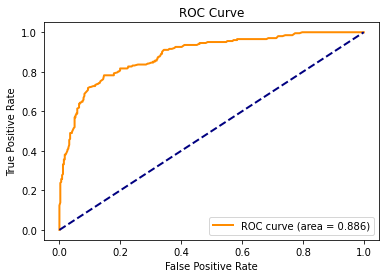

In [31]:
plot_roc(fpr_pew, tpr_pew, auc_pew)

**Interpretation:**

<u>Evaluation</u>: The AUC for the **training dataset** 0.886, which is higher than it was for the test dataset (ie. AUC = 0.818).! 


However, this is to be expected! We would expect to get better predictions from the **training dataset** that we specifically used to pick the values of $\hat{\beta}_0, \hat{\beta}_1,...,\hat{\beta}_p$ that would fit the **training dataset** the most.

However, using this AUC of 0.886 to assess how well this model would be at predicting the probability that an adult living in the U.S. supports the president's foreign policy **for new data** would be misleading.

It is much more likely that this model would be slightly worse (with an AUC=0.818) at predicting the probability that an adult living in the U.S. supports the president's foreign policy **for new data**.

---
STAT 207, Julie Deeke, Victoria Ellison and Douglas Simpson, University of Illinois at Urbana-Champaign